Датасет включает в себя данные о дефектах стальных пластин.  
Имеется 27 числовых признаков:
1. X_Minimum 
1. X_Maximum 
1. Y_Minimum 
1. Y_Maximum 
1. Pixels_Areas 
1. X_Perimeter 
1. Y_Perimeter 
1. Sum_of_Luminosity 
1. Minimum_of_Luminosity 
1. Maximum_of_Luminosity 
1. Length_of_Conveyer 
1. TypeOfSteel_A300 
1. TypeOfSteel_A400 
1. Steel_Plate_Thickness 
1. Edges_Index 
1. Empty_Index 
1. Square_Index 
1. Outside_X_Index 
1. Edges_X_Index 
1. Edges_Y_Index 
1. Outside_Global_Index 
1. LogOfAreas 
1. Log_X_Index 
1. Log_Y_Index 
1. Orientation_Index 
1. Luminosity_Index 
1. SigmoidOfAreas

По этим признакам нужно классифицировать один из 7 типов дефекта:
1. Pastry 
2. Z_Scratch 
3. K_Scatch 
4. Stains 
5. Dirtiness 
6. Bumps 
7. Other_Faults 

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [127]:
data = pd.read_csv('C:/Users/Nik/Desktop/datasets/Steel Plates Faults/Faults.NNA_with_headers.txt', sep = '\t', engine = 'python')
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.9205,0.2791,1.0000,1,0,0,0,0,0,0
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.5000,0.1841,0.3359,1,0,0,0,0,0,0
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.5000,-0.1197,0.5593,1,0,0,0,0,0,0
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.9024,-0.0651,1.0000,1,0,0,0,0,0,0


In [128]:
classes = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
print(data.shape)

(1941, 34)


In [129]:
y = pd.DataFrame()
for row in range(1941):
    for col in ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']:
        if data.at[row, col] == 1:
            y.at[row, 'Fault'] = col
print(y.shape)

(1941, 1)


In [130]:
data.drop(data.columns[[27, 28, 29, 30, 31, 32, 33]], axis=1, inplace=True)
print(data.shape)

(1941, 27)


In [131]:
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


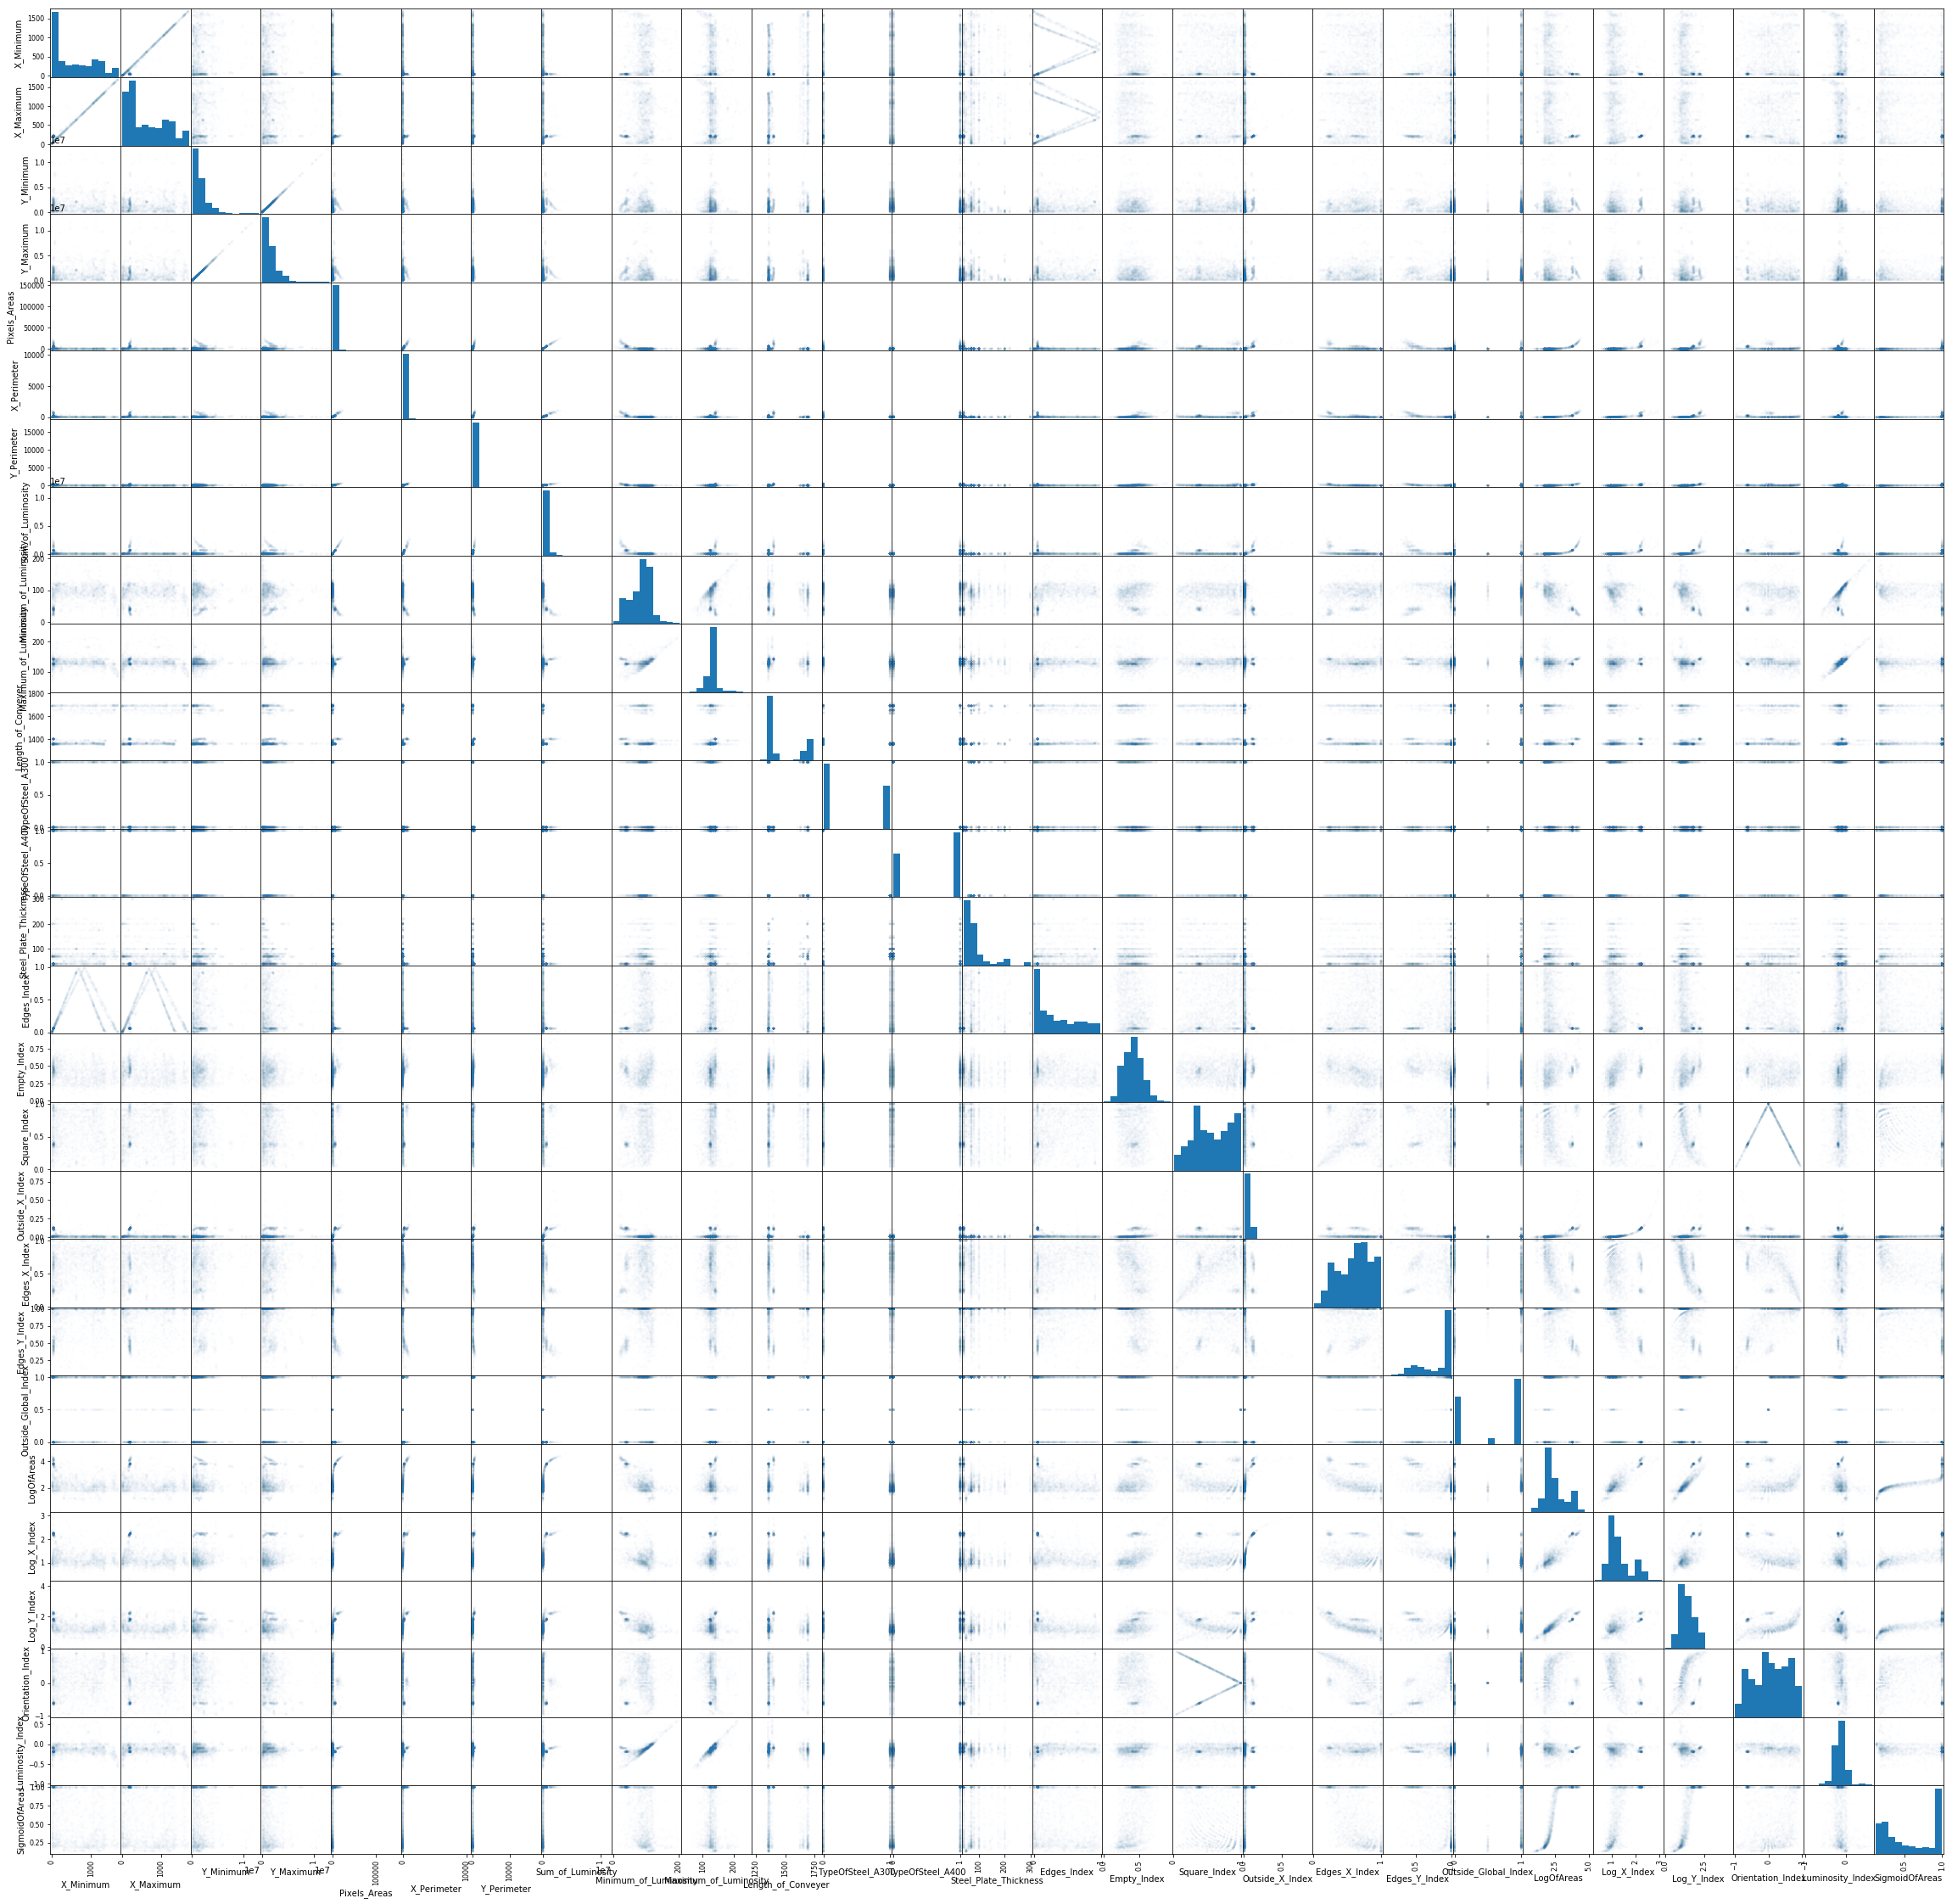

In [132]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (40, 40))
pass

Можно заметить, что некоторые пары признаков имеют практически линейную зависимость (например X_Minimum и X_Maximum).  
Некоторые признаки имеют шумовые значения (например Pixels_Areas). 

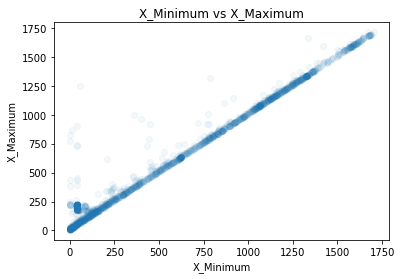

In [133]:
plt.plot(data['X_Minimum'], data['X_Maximum'], 'o', alpha = 0.05)
plt.xlabel('X_Minimum')
plt.ylabel('X_Maximum')
plt.title('X_Minimum vs X_Maximum')
pass

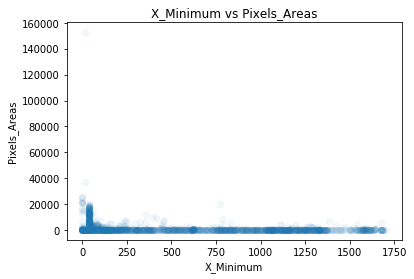

In [134]:
plt.plot(data['X_Minimum'], data['Pixels_Areas'], 'o', alpha = 0.05)
plt.xlabel('X_Minimum')
plt.ylabel('Pixels_Areas')
plt.title('X_Minimum vs Pixels_Areas')
pass

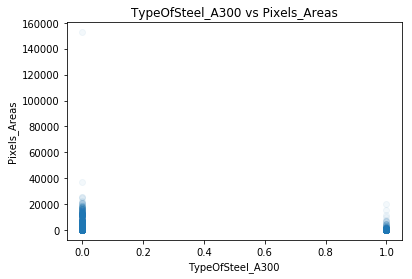

In [135]:
plt.plot(data['TypeOfSteel_A300'], data['Pixels_Areas'], 'o', alpha = 0.05)
plt.xlabel('TypeOfSteel_A300')
plt.ylabel('Pixels_Areas')
plt.title('TypeOfSteel_A300 vs Pixels_Areas')
pass

In [136]:
data.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


Нормализация признаков

In [137]:
data = (data - data.mean(axis = 0))/data.std(axis = 0)
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,...,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03
mean,5.319461e-16,8.431060e-17,-5.193624e-17,-1.544360e-17,-4.452904e-17,3.769096e-16,-1.451126e-16,-4.544421e-17,4.269297e-16,-4.893332e-16,...,1.143112e-15,2.190016e-15,-1.634876e-15,1.125438e-15,-1.194597e-14,7.411053e-15,8.714993e-15,-3.803129e-16,2.254479e-16,-6.445128e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.096882e+00,-1.233783e+00,-9.264019e-01,-9.264194e-01,-3.660430e-01,-3.647141e-01,-1.921906e-01,-4.022345e-01,-2.631106e+00,-4.986023e+00,...,-5.403743e-01,-2.450412e+00,-3.265721e+00,-1.193598e+00,-2.777672e+00,-2.148383e+00,-3.088558e+00,-2.144852e+00,-5.831911e+00,-1.374040e+00
25%,-9.989348e-01,-8.559907e-01,-6.646265e-01,-6.646367e-01,-3.501775e-01,-3.215547e-01,-1.640535e-01,-3.841355e-01,-6.705826e-01,-3.313743e-01,...,-4.538767e-01,-8.168824e-01,-9.248682e-01,-1.193598e+00,-7.200746e-01,-6.970059e-01,-7.132712e-01,-8.317313e-01,-4.281529e-01,-9.934266e-01
50%,-2.614528e-01,-3.033684e-01,-2.516411e-01,-2.516653e-01,-3.327642e-01,-2.850352e-01,-1.359164e-01,-3.652401e-01,1.696417e-01,-1.708692e-01,...,-3.945156e-01,1.063453e-01,5.716724e-01,8.795773e-01,-3.191518e-01,-3.313586e-01,-1.784355e-01,2.378344e-02,-1.139334e-02,-2.330830e-01
75%,9.254323e-01,9.124006e-01,3.000082e-01,2.999821e-01,-2.073884e-01,-9.247802e-02,7.972909e-05,-2.406845e-01,6.675524e-01,5.246530e-01,...,-1.672474e-01,7.788300e-01,7.961962e-01,8.795773e-01,5.355503e-01,3.795877e-01,7.244023e-01,8.551401e-01,4.349427e-01,1.220732e+00
max,2.177615e+00,2.200513e+00,6.388546e+00,6.388491e+00,2.916945e+01,3.431882e+01,4.236755e+01,2.222378e+01,3.686136e+00,6.570346e+00,...,1.428973e+01,1.600938e+00,7.961962e-01,8.795773e-01,3.411345e+00,3.609576e+00,6.284712e+00,1.813676e+00,5.198773e+00,1.221321e+00


In [138]:
X = data
feature_names = X.columns
N, d = X.shape

Разделение данных на тестовую и обучающую выборку

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1552 389


In [140]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#### KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 4, 5, 6, 10, 15, 20, 25, 35]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.25193298969072164 5


In [142]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.1797680412371134 0.27249357326478146


Ошибка на тестовой выборке заметно выше чем на обучающей, что говорит о переобучении.

#### Нейронные сети

In [115]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (40,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test = np.mean(y_test != mlp_model.predict(X_test))
print(err_train, err_test)

0.0 0.32390745501285345


Подбор оптимального значения параметра alpha

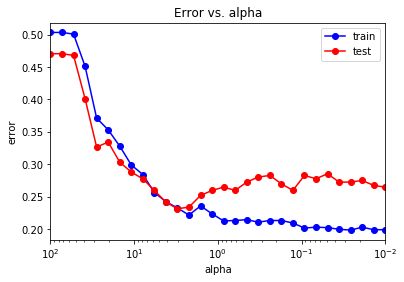

In [116]:
alpha_arr = np.logspace(-2, 2, 30)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (6,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [117]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.19845360824742267 0.23136246786632392


In [118]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

3.039195382313198


In [119]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (40,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.18363402061855671
0.2365038560411311


In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 45   0   0  20   5   1   1]
 [  1   5   0   2   0   0   0]
 [  0   0  78   3   0   0   1]
 [ 20   3   4 105   7   0   4]
 [  2   0   0   8  17   0   0]
 [  0   0   1   1   0  12   0]
 [  4   0   0   4   0   0  35]]


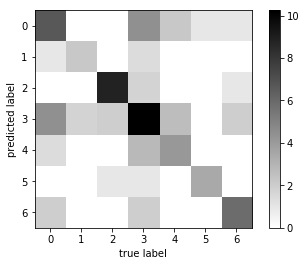

In [121]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(7))
plt.yticks(range(7))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Подбор количества нейронов в скрытом слое сети.

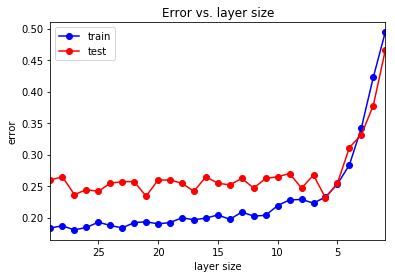

In [122]:
layer_size_arr = np.arange(1, 30, 1)
test_err = []
train_err = []
for layer_size in layer_size_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (layer_size,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.plot(layer_size_arr, train_err, 'b-o', label = 'train')
plt.plot(layer_size_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(layer_size_arr), np.min(layer_size_arr)])
plt.title('Error vs. layer size')
plt.xlabel('layer size')
plt.ylabel('error')
plt.legend()
pass

In [123]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.18041237113402062 0.23136246786632392


In [124]:
layer_size_opt = layer_size_arr[test_err == min_test_err]
layer_size_opt = layer_size_opt[0]
print(layer_size_opt)

6


In [125]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (layer_size_opt,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test = np.mean(y_test != mlp_model.predict(X_test))
print(err_train, err_test)

0.23260309278350516 0.23136246786632392


Сеть обучилась достаточно хорошо, ошибки на тестовой и обучающей выборках практически одинаковы.  
Изменение параметра alpha и количества нейронов не снизит ошибку на тестовой выборке и приведёт к недообучению или переобучению.